In [28]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
img = cv2.imread('../test_images/sharapova2.jpg')
img.shape

(977, 1200, 3)

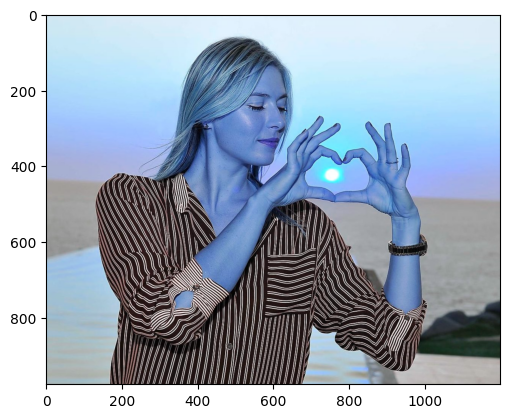

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape


(977, 1200)

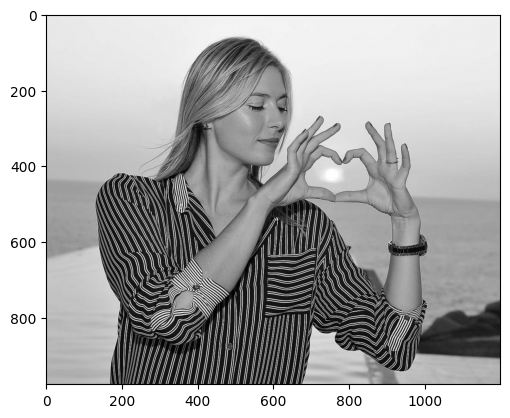

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.1, 7)
faces

array([[485, 166, 207, 207]], dtype=int32)

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(485), np.int32(166), np.int32(207), np.int32(207))

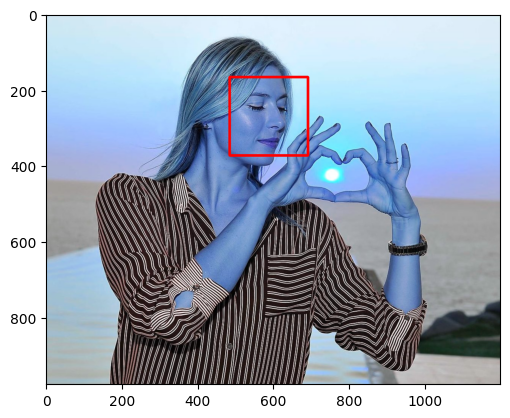

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h), (255,0,0),5)
plt.imshow(face_img)

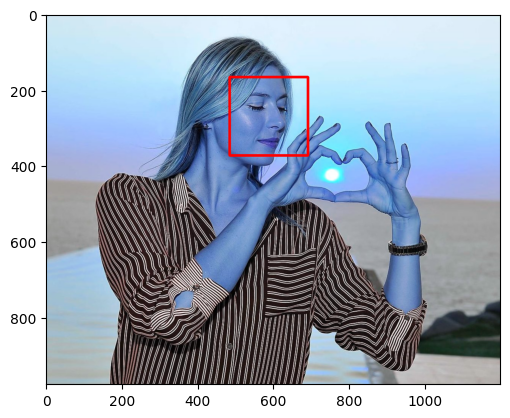

0


In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 5)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),5)

plt.figure()
plt.imshow(face_img, cmap = 'gray')
plt.show()
print(len(eyes))

In [10]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return None
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

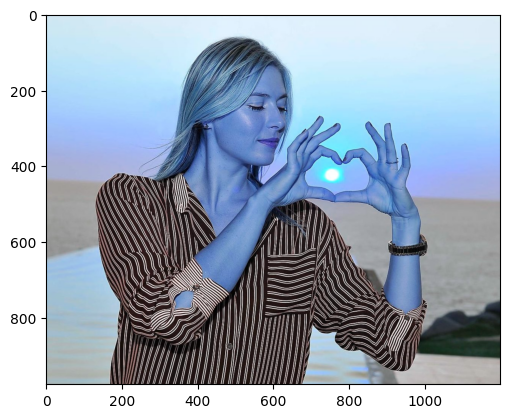

In [11]:
img = cv2.imread('../test_images/sharapova2.jpg')
plt.imshow(img)

In [12]:
cropped = get_cropped_image_if_2_eyes('../test_images/sharapova2.jpg')
cropped

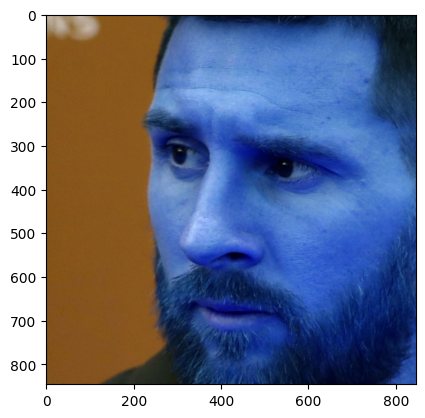

In [13]:
cropped = get_cropped_image_if_2_eyes('../test_images/lionel.jpg')
plt.imshow(cropped)

In [14]:
path_to_data =  './dataset'
path_to_cr_data = './dataset/cropped/'

In [15]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

    

In [16]:
img_dirs

['./dataset/maria_sharapova',
 './dataset/virat_kohli',
 './dataset/lionel_messi',
 './dataset/cropped',
 './dataset/serena_williams',
 './dataset/roger_federer']

In [17]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [18]:
import os
import cv2

cropped_img_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]

    for entry in os.scandir(img_dir):
        if entry.name == ".DS_Store":
            continue 
        
        roi_color = get_cropped_image_if_2_eyes(entry.path)

        if roi_color is not None:
            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)

            # Ensure the folder exists
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print('Generating cropped images in folder', cropped_folder)

            # Initialize dictionary entry if not exists
            if celebrity_name not in celebrity_file_names_dict:
                celebrity_file_names_dict[celebrity_name] = []  

            cropped_file_name = f"{celebrity_name}{count}.png"  # Use f-string for clarity
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1


Generating cropped images in folder ./dataset/cropped/maria_sharapova
Generating cropped images in folder ./dataset/cropped/virat_kohli
Generating cropped images in folder ./dataset/cropped/lionel_messi
Error: Unable to load image at ./dataset/cropped/maria_sharapova
Error: Unable to load image at ./dataset/cropped/virat_kohli
Error: Unable to load image at ./dataset/cropped/lionel_messi
Generating cropped images in folder ./dataset/cropped/serena_williams
Generating cropped images in folder ./dataset/cropped/roger_federer


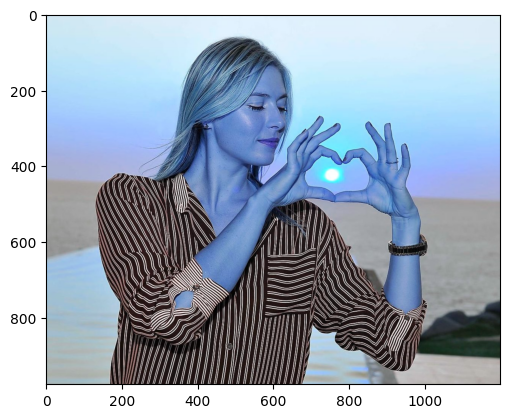

In [20]:
org_image_obstructed = cv2.imread('../test_images/sharapova2.jpg')
plt.imshow(org_image_obstructed)

In [23]:
cropped = get_cropped_image_if_2_eyes('../test_images/serena.jpg')

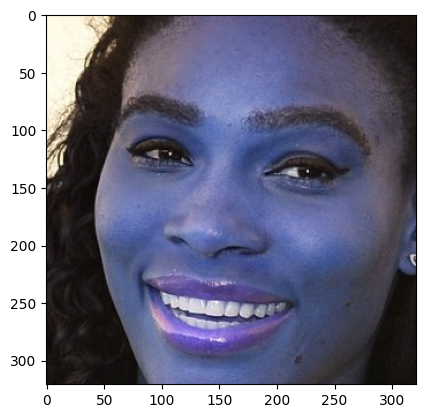

In [25]:
plt.imshow(cropped)

In [32]:
!pip3 install PyWavelets
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img

    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)

    imArray = np.float32(imArray)
    imArray /= 255;

    coeffs = pywt.wavedec2(imArray, mode, level = level)

    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)

    return imArray_H
    

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 3.4 MB/s eta 0:00:0000:0100:01


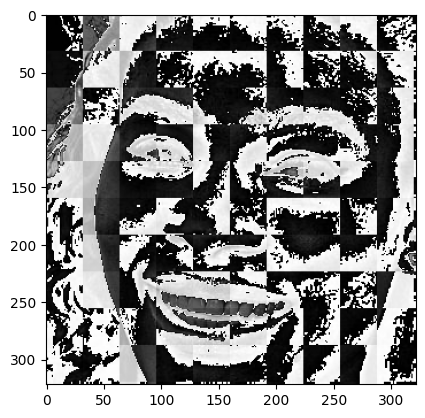

In [34]:
im_har = w2d(cropped, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [35]:
celebrity_file_names_dict

{'maria_sharapova': ['./dataset/cropped/maria_sharapova/maria_sharapova1.png',
  './dataset/cropped/maria_sharapova/maria_sharapova2.png',
  './dataset/cropped/maria_sharapova/maria_sharapova3.png',
  './dataset/cropped/maria_sharapova/maria_sharapova4.png',
  './dataset/cropped/maria_sharapova/maria_sharapova5.png',
  './dataset/cropped/maria_sharapova/maria_sharapova6.png',
  './dataset/cropped/maria_sharapova/maria_sharapova7.png',
  './dataset/cropped/maria_sharapova/maria_sharapova8.png',
  './dataset/cropped/maria_sharapova/maria_sharapova9.png',
  './dataset/cropped/maria_sharapova/maria_sharapova10.png',
  './dataset/cropped/maria_sharapova/maria_sharapova11.png',
  './dataset/cropped/maria_sharapova/maria_sharapova12.png',
  './dataset/cropped/maria_sharapova/maria_sharapova13.png',
  './dataset/cropped/maria_sharapova/maria_sharapova14.png',
  './dataset/cropped/maria_sharapova/maria_sharapova15.png',
  './dataset/cropped/maria_sharapova/maria_sharapova16.png',
  './dataset/c

In [38]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [47]:
X=[]
y=[]

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [48]:
len(X[0])

4096

In [49]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(169, 4096)

In [50]:
X[0]

array([ 43.,  43.,  43., ..., 253., 242.,  19.], shape=(4096,))

In [51]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)

0.8372093023255814

In [55]:
len(X_test)

43

In [56]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.91      1.00      0.95        10
           2       0.82      1.00      0.90         9
           3       0.75      0.75      0.75         8
           4       1.00      0.56      0.71         9

    accuracy                           0.84        43
   macro avg       0.85      0.83      0.82        43
weighted avg       0.85      0.84      0.83        43



In [57]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [63]:
model_params = {
    'svm' : {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C' : [1,10,100,1000],
            'svc__kernel' : ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [65]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv = 5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
df

/Users/sanishshrestha/Documents/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/sanishshrestha/Documents/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/sanishshrestha/Documents/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/sanishshrestha/Documents/venv/lib/python3.13/site-packages/s

model  best_score  \
0                  svm    0.792923   
1        random_forest    0.594462   
2  logistic_regression    0.817231   

                                    best_params  
0        {'svc__C': 1, 'svc__kernel': 'linear'}  
1  {'randomforestclassifier__n_estimators': 10}  
2                  {'logisticregression__C': 1}

In [66]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [68]:
best_estimators['svm'].score(X_test,y_test)

0.8604651162790697

In [69]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8837209302325582

In [70]:
best_estimators['random_forest'].score(X_test,y_test)

0.6744186046511628

In [71]:
best_clf = best_estimators['logistic_regression']

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0],
       [ 1,  0,  8,  0,  0],
       [ 2,  0,  0,  5,  1],
       [ 0,  0,  0,  1,  8]])

Text(95.72222222222221, 0.5, 'Truth')

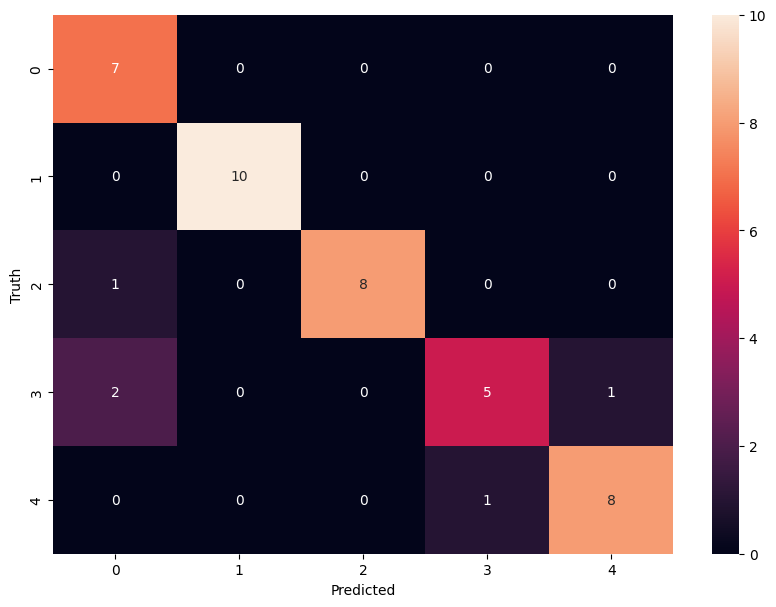

In [75]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [76]:
class_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [79]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [81]:
import json
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))